# Customer Churn Prediction in the Telecom Industry: Utilizing kNN Classification for Improved Retention Strategies

## Research Question
What factors contribute to customer churn in the telecom industry, and can we develop an accurate predictive model using kNN classification to identify customers at risk of churn?

In the highly competitive telecom industry, the ability to accurately predict the factors that lead to customer churn is of immense value. By understanding the behaviors, characteristics, and services that are more likely to prompt customers to switch providers, known as churn, telecom providers can develop effective strategies to mitigate this risk. Such insights would enable them to proactively address customer needs, enhance satisfaction, and implement targeted interventions to retain customers. Therefore, the identification of key churn predictors is crucial for devising successful business solutions in the telecom sector.
## Methodology
For this analysis, the k-Nearest Neighbors (k-NN) classification method was selected, as it is commonly used for categorical classification tasks (Grant, 2019). The goal is to predict whether a customer will churn or not based on the provided dataset. By leveraging the independent variables, the k-NN algorithm assigns a class label (Churn or No Churn) to each sample, making predictions by considering a specified number of nearest labeled neighbors. The expected outcome is to achieve a high accuracy rate in accurately predicting the Churn class for new, unlabeled data instances fed into the model. One underlying assumption of kNN is that items in close proximity to each other are similar and can be assigned a label based on this similarity (Grant, 2019).

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

plt.style.use('ggplot')

%matplotlib inline

label_encoder = LabelEncoder()

## Read in Data

In [2]:
address = "churn_clean.csv"

df = pd.read_csv(address)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Basic Data Exploration

### Dimensions of Data

In [3]:
dimensions = df.shape
print("Dimensions:", dimensions)

Dimensions: (10000, 50)


### Check Data Types

In [4]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

### Summary Statistics for Numerical Variables

In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


### Check for Null or Missing Values

In [6]:
# Checking for null or missing values in the DataFrame
null_counts = df.isnull().sum()
print("Null/missing value counts:\n", null_counts)


Null/missing value counts:
 CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessB

## Clean Data

### Remove Unnecessary or Redundant Variables to Reduce Diminsionality

In [7]:
# Drop columns not necessary for the analysis
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'Zip', 'City',
         'State', 'County', 'TimeZone','Job'], axis=1, inplace=True)
df.head()

,Lat,Lng,Population,Area,Children,Age,Income,Marital,Gender,Churn,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,Urban,0,68,28561.99,Widowed,Male,No,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,Urban,1,27,21704.77,Married,Female,Yes,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,Urban,4,50,9609.57,Widowed,Female,No,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,Suburban,1,48,18925.23,Married,Male,No,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,Suburban,0,83,40074.19,Separated,Male,Yes,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### One-Hot Encode All Categorical Variables

In [8]:
# Area
area_cat = df['Area']
area_encoded = label_encoder.fit_transform(area_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
area_1hot = binary_encoder.fit_transform(area_encoded.reshape(-1,1))
area_1hot_mat = area_1hot.toarray()

area_df = pd.DataFrame(area_1hot_mat, columns = ['Suburban','Urban']).astype(int)
area_df.head()                                # (Pierson, Part 2, 2019)

,Suburban,Urban
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [9]:
# Marital
marital_cat = df['Marital']
marital_encoded = label_encoder.fit_transform(marital_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
marital_1hot = binary_encoder.fit_transform(marital_encoded.reshape(-1,1))
marital_1hot_mat = marital_1hot.toarray()

marital_df = pd.DataFrame(marital_1hot_mat, columns = ['Married','NeverMarried', 'Separated', 'Widowed']).astype(int)
marital_df.head()

,Married,NeverMarried,Separated,Widowed
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0


In [10]:
# Gender
gender_cat = df['Gender']
gender_encoded = label_encoder.fit_transform(gender_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
gender_1hot = binary_encoder.fit_transform(gender_encoded.reshape(-1,1))
gender_1hot_mat = gender_1hot.toarray()

gender_df = pd.DataFrame(gender_1hot_mat, columns = ['Male','Nonbinary']).astype(int)
gender_df.head()

,Male,Nonbinary
0,1,0
1,0,0
2,0,0
3,1,0
4,1,0


In [11]:
# Churn
churn_cat = df['Churn']
churn_encoded = label_encoder.fit_transform(churn_cat)

churn_df = pd.DataFrame(churn_encoded, columns=['Churn'])
churn_df.head()

,Churn
0,0
1,1
2,0
3,0
4,1


In [12]:
# Techie
techie_cat = df['Techie']
techie_encoded = label_encoder.fit_transform(techie_cat)

techie_df = pd.DataFrame(techie_encoded, columns=['Techie'])
techie_df.head()

,Techie
0,0
1,1
2,1
3,1
4,0


In [13]:
# Port_modem
modem_cat = df['Port_modem']
modem_encoded = label_encoder.fit_transform(modem_cat)

modem_df = pd.DataFrame(modem_encoded, columns=['Port_modem'])
modem_df.head()

,Port_modem
0,1
1,0
2,1
3,0
4,1


In [14]:
# Tablet
tablet_cat = df['Tablet']
tablet_encoded = label_encoder.fit_transform(tablet_cat)

tablet_df = pd.DataFrame(tablet_encoded, columns=['Tablet'])
tablet_df.head()

,Tablet
0,1
1,1
2,0
3,0
4,0


In [15]:
# Phone
phone_cat = df['Phone']
phone_encoded = label_encoder.fit_transform(phone_cat)

phone_df = pd.DataFrame(phone_encoded, columns=['Phone'])
phone_df.head()

,Phone
0,1
1,1
2,1
3,1
4,0


In [16]:
# Multiple
multiple_cat = df['Multiple']
multiple_encoded = label_encoder.fit_transform(multiple_cat)

multiple_df = pd.DataFrame(multiple_encoded, columns=['Multiple'])
multiple_df.head()

,Multiple
0,0
1,1
2,1
3,0
4,0


In [17]:
# OnlineSecurity
OnlineSecurity_cat = df['OnlineSecurity']
OnlineSecurity_encoded = label_encoder.fit_transform(OnlineSecurity_cat)

OnlineSecurity_df = pd.DataFrame(OnlineSecurity_encoded, columns=['OnlineSecurity'])
OnlineSecurity_df.head()

,OnlineSecurity
0,1
1,1
2,0
3,1
4,0


In [18]:
# OnlineBackup
OnlineBackup_cat = df['OnlineBackup']
OnlineBackup_encoded = label_encoder.fit_transform(OnlineBackup_cat)

OnlineBackup_df = pd.DataFrame(OnlineBackup_encoded, columns=['OnlineBackup'])
OnlineBackup_df.head()

,OnlineBackup
0,1
1,0
2,0
3,0
4,0


In [19]:
# DeviceProtection
DeviceProtection_cat = df['DeviceProtection']
DeviceProtection_encoded = label_encoder.fit_transform(DeviceProtection_cat)

DeviceProtection_df = pd.DataFrame(DeviceProtection_encoded, columns=['DeviceProtection'])
DeviceProtection_df.head()

,DeviceProtection
0,0
1,0
2,0
3,0
4,0


In [20]:
# TechSupport
TechSupport_cat = df['TechSupport']
TechSupport_encoded = label_encoder.fit_transform(TechSupport_cat)

TechSupport_df = pd.DataFrame(TechSupport_encoded, columns=['TechSupport'])
TechSupport_df.head()

,TechSupport
0,0
1,0
2,0
3,0
4,1


In [21]:
# StreamingTV
StreamingTV_cat = df['StreamingTV']
StreamingTV_encoded = label_encoder.fit_transform(StreamingTV_cat)

StreamingTV_df = pd.DataFrame(StreamingTV_encoded, columns=['StreamingTV'])
StreamingTV_df.head()

,StreamingTV
0,0
1,1
2,0
3,1
4,1


In [22]:
# StreamingMovies
StreamingMovies_cat = df['StreamingMovies']
StreamingMovies_encoded = label_encoder.fit_transform(StreamingMovies_cat)

StreamingMovies_df = pd.DataFrame(StreamingMovies_encoded, columns=['StreamingMovies'])
StreamingMovies_df.head()

,StreamingMovies
0,1
1,1
2,1
3,0
4,0


In [23]:
# PaperlessBilling
PaperlessBilling_cat = df['PaperlessBilling']
PaperlessBilling_encoded = label_encoder.fit_transform(PaperlessBilling_cat)

PaperlessBilling_df = pd.DataFrame(PaperlessBilling_encoded, columns=['PaperlessBilling'])
PaperlessBilling_df.head()

,PaperlessBilling
0,1
1,1
2,1
3,1
4,0


In [24]:
# Contract
contract_cat = df['Contract']
contract_encoded = label_encoder.fit_transform(contract_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
contract_1hot = binary_encoder.fit_transform(contract_encoded.reshape(-1,1))
contract_1hot_mat = contract_1hot.toarray()

contract_df = pd.DataFrame(contract_1hot_mat, columns = ['OneYear','TwoYears']).astype(int)
contract_df.head()

,OneYear,TwoYears
0,1,0
1,0,0
2,0,1
3,0,1
4,0,0


In [25]:
# InternetService
internet_service_cat = df['InternetService']
internet_service_encoded = label_encoder.fit_transform(internet_service_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
internet_service_1hot = binary_encoder.fit_transform(internet_service_encoded.reshape(-1,1))
internet_service_1hot_mat = internet_service_1hot.toarray()

internet_df = pd.DataFrame(internet_service_1hot_mat, columns = ['Fiber','None']).astype(int)
internet_df.head()

,Fiber,None
0,1,0
1,1,0
2,0,0
3,0,0
4,1,0


In [26]:
# PaymentMethod
payment_method_cat = df['PaymentMethod']
payment_method_encoded = label_encoder.fit_transform(payment_method_cat)

binary_encoder = OneHotEncoder(categories='auto', drop='first')
payment_method_1hot = binary_encoder.fit_transform(payment_method_encoded.reshape(-1,1))
payment_method_1hot_mat = payment_method_1hot.toarray()

payment_df = pd.DataFrame(payment_method_1hot_mat, columns = ['CreditCard','ElectronicCheck', 'MailedCheck']).astype(int)
payment_df.head()

,CreditCard,ElectronicCheck,MailedCheck
0,1,0,0
1,0,0,0
2,1,0,0
3,0,0,1
4,0,0,1


### Drop Original Categorical Variables

In [27]:
# Drop original categorical columns
df.drop(['Area', 'Marital', 'Gender', 'Churn', 
         'Techie', 'Contract', 'Port_modem',
         'Tablet', 'InternetService', 'Phone',
         'Multiple', 'OnlineSecurity', 'OnlineBackup',
         'DeviceProtection', 'TechSupport', 'StreamingTV',
         'StreamingMovies', 'PaperlessBilling','PaymentMethod'], axis=1, inplace=True)
df.head()

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,...,149.948316,271.493436,4,4,4,3,4,4,4,5


### Create New DataFrame with Encoded and Numerical Variables

In [28]:
df = pd.concat([df, churn_df, techie_df, modem_df, tablet_df, phone_df, multiple_df,
                OnlineSecurity_df, OnlineBackup_df, DeviceProtection_df, TechSupport_df,
                StreamingTV_df, StreamingMovies_df, PaperlessBilling_df, marital_df,
                gender_df, contract_df, internet_df], axis=1, verify_integrity=True)

df[0:5]                                  # (Pierson, Part 2, 2019)

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,...,Married,NeverMarried,Separated,Widowed,Male,Nonbinary,OneYear,TwoYears,Fiber,None
0,56.25100,-133.37571,38,0,68,28561.99,7.978323,10,0,1,...,0,0,0,1,1,0,1,0,1,0
1,44.32893,-84.24080,10446,1,27,21704.77,11.699080,12,0,1,...,1,0,0,0,0,0,0,0,1,0
2,45.35589,-123.24657,3735,4,50,9609.57,10.752800,9,0,1,...,0,0,0,1,0,0,0,1,0,0
3,32.96687,-117.24798,13863,1,48,18925.23,14.913540,15,2,0,...,1,0,0,0,1,0,0,1,0,0
4,29.38012,-95.80673,11352,0,83,40074.19,8.147417,16,2,1,...,0,0,1,0,1,0,0,0,1,0


## Visualizing the Target Variable Distribution

### Target Variable: Churn

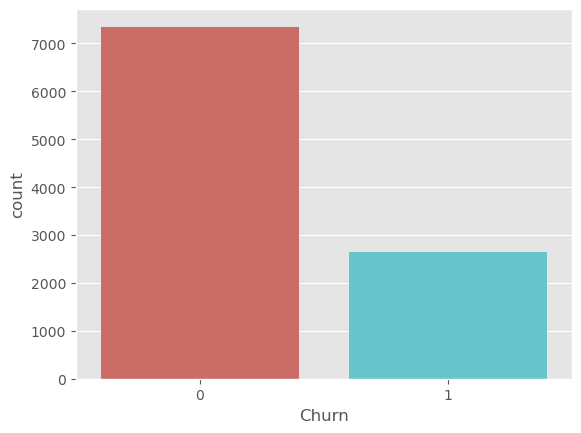

In [29]:
sns.countplot(x='Churn', data=df, palette='hls')
plt.show()

## Split the Data into Training and Testing Sets

In [30]:
# Create feature and target arrays
y = df['Churn']
X = df.drop('Churn', axis = 1)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state=42)

## kNN Classifier

A pipeline was used to scale the data, perform GridSearchCV to tune the parameter *n_neighbors* and cross-validate, and finally fit the k-NN model to the training data. After that the test data was used to predict the class of the unseen data and an accuracy score was calculated. (Supervised, n.d.).

The results of the kNN show that:
1. Tuned *k* in kNN: The optimal value for the number of neighbors (*k*) based on the grid search is 23. This value was selected as the best parameter for your kNN classifier.

2. Accuracy score: The accuracy score of 0.8495 indicates that your model correctly predicted the class labels for approximately 84.95% of the samples in the test set.

3. Precision, Recall, and F1-score: The precision, recall, and F1-score are metrics used to evaluate the performance of a classifier.

- Precision: Precision measures the proportion of correctly predicted positive samples (class 1) out of all samples predicted as positive. In your case, the precision for class 1 is 0.86, indicating that when the model predicts a sample as class 1, it is correct 86% of the time.

- Recall: Recall measures the proportion of correctly predicted positive samples (class 1) out of all actual positive samples. In your case, the recall for class 1 is 0.53, indicating that the model correctly identifies 53% of the actual positive samples.

- F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. The weighted average F1-score in your case is 0.84, indicating a reasonable balance between precision and recall for both classes.

In [31]:
# Set pipeline steps with scaling 
steps = [('scaler', MinMaxScaler()),
          ('knn', KNeighborsClassifier())]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Hyperparameter tuning with GridSearchCV
parameters = {'knn__n_neighbors': np.arange(1,50)}
cv = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1)

# Fit to training data
cv.fit(X_train, y_train.values.ravel())

# Predict on test data
y_pred = cv.predict(X_test)

print("Tuned k in kNN: {}".format(cv.best_params_))
print("Accuracy score is {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))                    # (Supervised, n.d.)

Tuned k in kNN: {'knn__n_neighbors': 23}
Accuracy score is 0.8495
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1456
           1       0.86      0.53      0.66       544

    accuracy                           0.85      2000
   macro avg       0.85      0.75      0.78      2000
weighted avg       0.85      0.85      0.84      2000



## Confusion Matrix Heatmap
The confusion matrix heatmap indicate that out of 2000 test samples:

- 1409 samples were correctly predicted as class 0 (true negatives)
- 47 samples were incorrectly predicted as class 1 (false positives)
- 254 samples were incorrectly predicted as class 0 (false negatives)
- 290 samples were correctly predicted as class 1 (true positives)

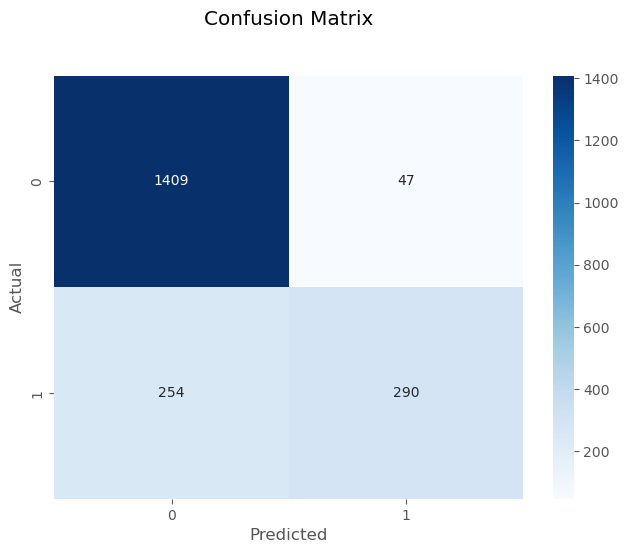

In [32]:
confusion_matrix = confusion_matrix(y_test, y_pred)
class_names = ['0', '1']  # names of classes

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues", fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()                                    # (Python, n.d.)

## ROC Curve
Plotting the Receiver Operating Characteristic (ROC curve), a probability curve which shows the true positive rate versus the false positive rate, gives an area under the curve of 0.93 or 93% (AUC-ROC, 2020).  This statistic indicates that the model is highly accurate and reliable, with a probability of 93%, for predicting whether or not a customer will churn.

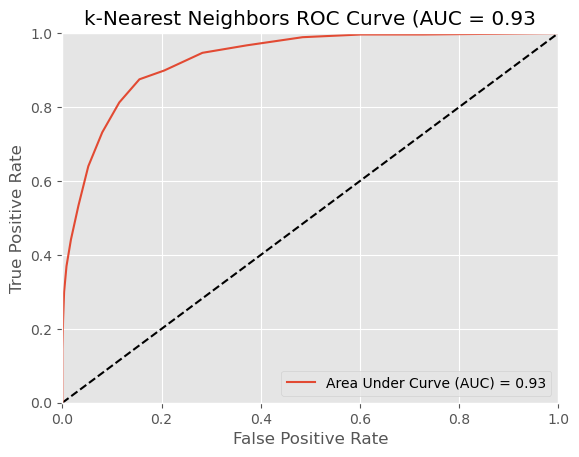

In [33]:
y_pred_prob = cv.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label='Area Under Curve (AUC) = %0.2f' % roc_auc_score(y_test, y_pred_prob))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('k-Nearest Neighbors ROC Curve (AUC = %0.2f' % roc_auc_score(y_test, y_pred_prob))
plt.legend(loc="lower right")
plt.show()                             # (Li, 2019) and (Chelaru, n.d.)

## Recommendations

This analysis provides the telecom company with an effective method to predict customers who are at risk of churning based on their characteristics and purchasing habits, surpassing mere guesswork. The model achieves an impressive 93% reliability in predicting churn for both current and future customers, making it a valuable tool for informing sales predictions and identifying future business needs.

However, it is important to note a limitation of this analysis. The model's performance in correctly identifying the minority class, specifically the churned customers, stands at a rate of 66%. To further enhance the overall accuracy of the model and specifically improve its performance in identifying the minority class, additional model tuning and improvements should be considered.

Based on these findings, I recommend that the telecom company utilize this predictive model to aid in projecting business growth and anticipating future needs. Additionally, conducting further research into the specific needs and purchasing habits of their customers would enable a more focused analysis and potentially lead to valuable insights.

## References
AUC-ROC Curve in Machine Learning Clearly Explained. (2020, July 20). Retrieved from https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

Chelaru, M. (n.d.). Implementing ROC Curves for K-NN machine learning algorithm using python and Scikit Learn. Retrieved from https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

Grant, P. (2019, July 21). Introducing k-Nearest Neighbors. Retrieved from https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5

Li, S. (2019, February 27). Building A Logistic Regression in Python, Step by Step. Retrieved from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

Pierson, L. (2019, October 25). Retrieved from https://www.linkedin.com/learning/python-for-data-science-essential-training-part-2/

Supervised Learning with scikit-learn. (n.d.). Retrieved from https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/

Python Logistic Regression with Sklearn & Scikit. (n.d.). Retrieved from https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
